In [6]:
import numpy as n
import matplotlib.pyplot as p
import ipywidgets as widg
%matplotlib notebook

<IPython.core.display.Javascript object>


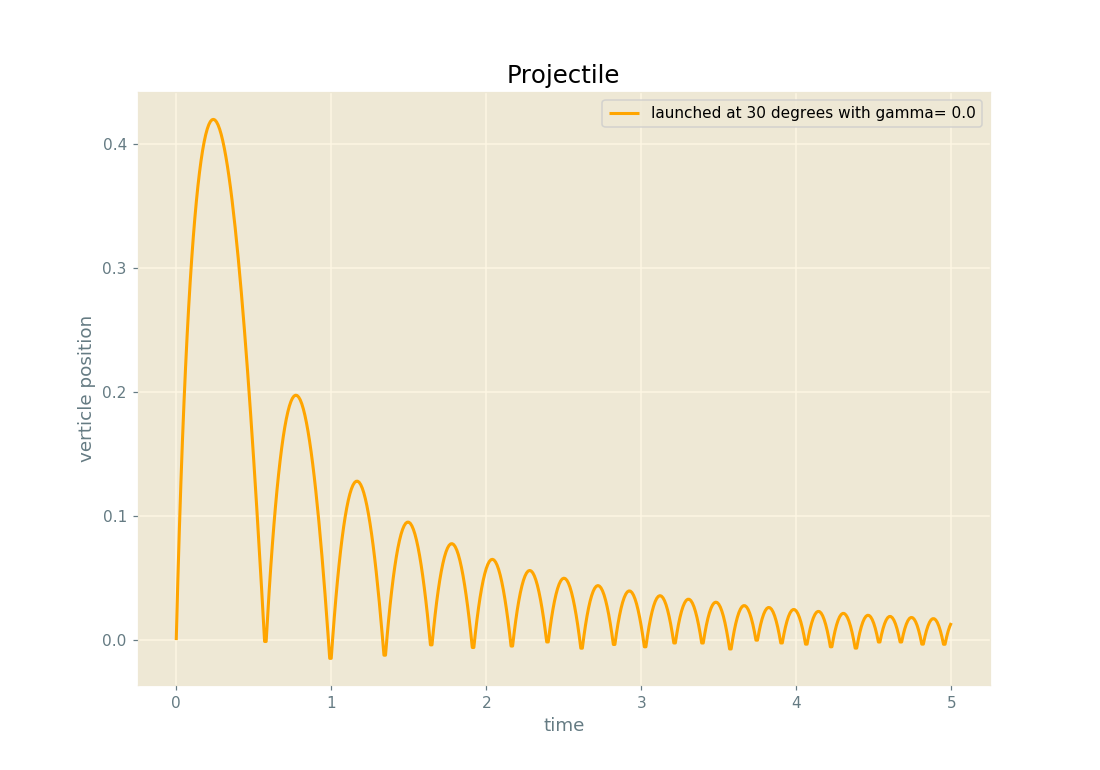

In [8]:
###### INITIAL CONDITIONS and SYSTEM PARAMETERS
gamma = 0.
beta = 1.

# As the input parameter is initial speed and angle to horizontal 
V =10
alpha= n.pi/6
g=9.8


# initial position
X = 0.0
Y = 0.0
# initial velocity
Y_dot = V*n.sin(alpha)
X_dot = V*n.cos(alpha)
# # initial time
T = 0.0
# end time 
T_end = 5    
## the step of time would del_T (unit increment in time)
del_T = .01
## therefore the number of iteration you need to reach T_end
N = int( T_end / del_T )


#### DEFINING VARIABLE and their 'HISTORIANS'

# Defining speed as a function
def sp(X_dot, Y_dot):
    return n.sqrt(Y_dot**2+X_dot**2)

# Defining x component of acceleration as a function 
def A_x(X_dot, Y_dot):
    return -gamma*X_dot-beta*sp(X_dot, Y_dot)*X_dot

# Defining y component of acceleration as a function 
def A_y(X_dot, Y_dot):
    return -g-gamma*Y_dot-beta*sp(X_dot, Y_dot)*Y_dot

# Defining y component of velocity as a function
def V_y(Y_dot):
    return Y_dot

# Defining x component of velocity as a function
def V_x(X_dot):
    return X_dot

T_list = n.array([T])
X_list = n.array([X])
Y_list = n.array([Y])
Y_dot_list = n.array([Y_dot])
X_dot_list = n.array([X_dot])


#### SOLVING DE with modified euler 

# point to be noted, we have never encountered 2-D problem before;
# compare this with 1-D recursions, you have done.

for i in range (N):
    
    # We need to update everything simultaneously, due to the coupling 
    # of equations (coupling is a fancy term for dependence!!)

    if (Y<=0 and Y_dot<=0):   # By brute-force, we are going to show the projectile-ground interaction. 
        
        # Since on collision with the ground, only y component of velocity is reversed
        Y_dot=-Y_dot
        
        # another thing you would notice, I have updated Y_dot earlier. See, how it can change the recursion.
        
        # velocity update at first point
        k1= del_T*A_x(X_dot,Y_dot)
                
        # velocity update at second point
        k3= del_T*A_x(X_dot+k1,Y_dot)
        
        # position update at first point
        k5= del_T*V_x(X_dot)
       
        # position update at second point
        k7= del_T*V_x(X_dot+k1)

        
        X     += 0.5*(k5+k7)
        X_dot += 0.5*(k1+k3)
        

    else :    
        # velocity update at first point
        k1= del_T*A_x(X_dot,Y_dot)
        k2= del_T*A_y(X_dot,Y_dot)

        # velocity update at second point
        k3= del_T*A_x(X_dot+k1, Y_dot+k2)
        k4= del_T*A_y(X_dot+k1, Y_dot+k2)

        # position update at first point
        k5= del_T*V_x(X_dot)
        k6= del_T*V_y(Y_dot)

        # position update at second point
        k7= del_T*V_x(X_dot+k1)
        k8= del_T*V_y(Y_dot+k2)

        Y     += 0.5*(k6+k8)   
        X     += 0.5*(k5+k7)
        Y_dot += 0.5*(k2+k4)
        X_dot += 0.5*(k1+k3)

    # time updatation
    T +=del_T
    
    # 'writing the history' (updating arrays)
    T_list = n.append(T_list,T)
    Y_list = n.append(Y_list,Y)
    X_list = n.append(X_list,X)
    Y_dot_list = n.append(Y_dot_list,Y_dot)
    X_dot_list = n.append(X_dot_list,X_dot)

    # energy consideration 
    
    E_list= g*Y_list+0.5*n.sqrt(Y_dot_list**2+X_dot_list**2)
    
    
p.figure(figsize=(10,7))    
p.title("Projectile")
p.xlabel("time")
p.ylabel("verticle position")
p.plot(T_list,Y_list,color='orange',label='launched at 30 degrees with gamma= ' + str(gamma))
p.legend()
